# Copy items-Copy1.csv file into pandas dataframe and 
# replace all fields that are empty with NaN

In [185]:
import pandas as pd
import numpy as np

# read dataset into pandas dataframe
df_items = pd.read_csv('items-Copy1.csv')

# replace field that's entirely space (or empty) with NaN
df_items = df_items.replace(np.nan, '', regex=True)

data_text = df_items[['description']]
data_text['index'] = data_text.index

documents = data_text

/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [186]:
len(documents)

3012

In [187]:
documents[:5]

,description,index
0,Black American racial experience is real. We s...,0
1,The best costume for Halloween worth posting. ...,1
2,"Keep on whining and crying for your president,...",2
3,"End the whining and crying, end the riots with...",3
4,Black girls are the definition of national gre...,4


# Need to perform the following steps:
1. Tokenization -- split text into sequences and sentences into words.
    Lowercase all words and remove punctuation.
2. Remove words with fewer than 3 characters
3. Remove stopwords
4. Lemmatize words -- words in third person are changed to first person
    and verbs in past and future tenses are changed into present.
5. Stem words --  words are reduced to root form.

## gensim and nltk libraries will be used to 
## implement this.

In [188]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [189]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tobbylie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Lemmatize example

In [190]:
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


# Stemmer Example

In [191]:
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied', 'died', 'agreed', 'owned',
                  'humbled', 'sized', 'meeting', 'stating', 'siezing', 'itemization', 'sensational',
                  'traditional', 'reference', 'colonizer', 'plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data={'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


# Function in order to lemmatize and stem
# preprocess on the dataset

In [192]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [193]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

# Initialize stemmer

In [194]:
stemmer = SnowballStemmer('english')

# Display before and after of preprocessing on
# example document

In [195]:
doc_sample = documents[documents['index'] == 3].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)

print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['End', 'the', 'whining', 'and', 'crying,', 'end', 'the', 'riots', 'with', 'these', 'same', 'white\npeople(democrats),', 'who', 'will', 'not', 'march', 'with', 'you', 'when', 'your', 'son,', 'daughter', 'or\nloved', 'one', 'gets', 'shot', 'for', 'being', 'Black.\n\nI', 'opted', 'out', 'of', 'the', 'elections', 'and', 'i', 'had', 'many', 'Black', 'people', 'all', 'up', 'in', 'my', 'case,\ntelling', 'me', 'how', 'i', 'was', 'wrong', 'and', 'how', 'i', 'needed', 'to', 'make', 'my', 'vote', 'count', 'for', 'Mrs.\nClinton,', 'all', 'just', 'to', 'make', 'sure', 'Trump', "doesn't", 'become', 'president.\n\nWell', 'now', 'all', 'i', 'want', 'to', 'say', 'is', 'get', 'over', 'Trump', 'and', 'Clinton,', 'they', 'are', 'rich', 'white\npeople,', 'the', 'elite', 'who', 'were', 'born', 'into', 'and', 'are', 'a', 'part', 'of', 'the', 'system.\n\nI', 'dream', 'of', 'liberation,', 'not', 'staying', 'a', 'slave', 'under', 'Hillary', 'or', 'Trump,', 'so', 'forget\nyour', 'Childish', 

# Preprocess all description field text
# Save result in 'processed_docs'

In [196]:
processed_docs = documents['description'].map(preprocess)
processed_docs[:10]

0    [black, american, racial, experi, real, suppor...
1    [best, costum, halloween, worth, post, power, ...
2    [whine, cri, presid, wasn, elect, imma, care, ...
3    [whine, cri, riot, white, peopl, democrat, mar...
4                [black, girl, definit, nation, great]
5    [imma, stay, comfi, untouch, work, hard, care,...
6    [disgust, video, circul, internet, show, unide...
7                           [imit, life, photo, great]
8    [america, racial, oppress, racism, ancient, hi...
9    [donald, john, trump, elect, presid, unit, sta...
Name: description, dtype: object

# Create Bag of Words with Data set
## Start with creating dictionary with number of times a word appears in training set then filter out tokens that appear in:
1. less than 15 documents OR
2. more than 0.5 documents
### * Keep only first 100000 most frequent tokens

In [197]:
dictionary = gensim.corpora.Dictionary(processed_docs)

dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Utilize doc2bow from gensim 

In [198]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[3000]

[(7, 1),
 (16, 1),
 (113, 1),
 (135, 1),
 (147, 1),
 (161, 2),
 (233, 1),
 (252, 1),
 (360, 1),
 (375, 1),
 (406, 3),
 (438, 1),
 (478, 1),
 (494, 1),
 (509, 1),
 (518, 1),
 (596, 1),
 (602, 1)]

# Preview BoW from sample preprocessed document

In [199]:
bow_doc_3000 = bow_corpus[3000]
for i in range(len(bow_doc_3000)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_3000[i][0],
                                                     dictionary[bow_doc_3000[i][0]],
                                                     bow_doc_3000[i][1]))

Word 7 ("peopl") appears 1 time.
Word 16 ("educ") appears 1 time.
Word 113 ("month") appears 1 time.
Word 135 ("free") appears 1 time.
Word 147 ("prove") appears 1 time.
Word 161 ("communiti") appears 2 time.
Word 233 ("believ") appears 1 time.
Word 252 ("proud") appears 1 time.
Word 360 ("meet") appears 1 time.
Word 375 ("charlott") appears 1 time.
Word 406 ("legal") appears 3 time.
Word 438 ("have") appears 1 time.
Word 478 ("announc") appears 1 time.
Word 494 ("basi") appears 1 time.
Word 509 ("provid") appears 1 time.
Word 518 ("night") appears 1 time.
Word 596 ("empow") appears 1 time.
Word 602 ("focus") appears 1 time.


# Create tf-idf model using models.tfidfmodel on
# bow_corpus

In [200]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
# from pprint import pprint
# for doc in corpus_tfidf:
#     pprint(doc)

# Train LDA model using gensim.models.LdaMulticore
# Save to 'lda_model'

In [201]:
lda_model = gensim.models.LdaMulticore(
    bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

# For each topic, explore the words occuring in that
# topic and the relative weight

In [202]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.029*"black" + 0.019*"like" + 0.016*"life" + 0.015*"join" + 0.014*"need" + 0.014*"year" + 0.013*"free" + 0.013*"stop" + 0.011*"peopl" + 0.011*"communiti"
Topic: 1 
Words: 0.086*"black" + 0.044*"communiti" + 0.037*"matter" + 0.025*"support" + 0.024*"join" + 0.019*"life" + 0.018*"live" + 0.017*"patriot" + 0.015*"polic" + 0.015*"year"
Topic: 2 
Words: 0.027*"defens" + 0.025*"school" + 0.025*"free" + 0.023*"seif" + 0.022*"join" + 0.021*"class" + 0.019*"friend" + 0.018*"bring" + 0.018*"feel" + 0.017*"event"
Topic: 3 
Words: 0.027*"black" + 0.024*"https" + 0.020*"facebook" + 0.020*"follow" + 0.017*"america" + 0.015*"william" + 0.015*"peopl" + 0.012*"twitter" + 0.012*"communiti" + 0.012*"proud"
Topic: 4 
Words: 0.021*"repost" + 0.018*"like" + 0.016*"offic" + 0.013*"woman" + 0.013*"live" + 0.012*"news" + 0.012*"transgend" + 0.011*"black" + 0.011*"polic" + 0.010*"shoot"
Topic: 5 
Words: 0.024*"https" + 0.023*"follow" + 0.016*"american" + 0.015*"peopl" + 0.013*"instagram" + 0.0

# Attempt distinguishing topics using words in each topic and their corresponding weights Run LDA using tf-idf

In [203]:
lda_model_tfidf = gensim.models.LdaMulticore(
    corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.021*"black" + 0.017*"matter" + 0.013*"polic" + 0.013*"girl" + 0.012*"year" + 0.012*"live" + 0.010*"nation" + 0.009*"join" + 0.008*"educ" + 0.008*"say"
Topic: 1 Word: 0.018*"join" + 0.018*"beauti" + 0.018*"black" + 0.015*"proud" + 0.014*"want" + 0.013*"heart" + 0.013*"america" + 0.011*"texa" + 0.011*"live" + 0.011*"girl"
Topic: 2 Word: 0.016*"immigr" + 0.014*"welcom" + 0.014*"music" + 0.014*"free" + 0.014*"facemus" + 0.013*"listen" + 0.012*"communiti" + 0.012*"meme" + 0.011*"need" + 0.011*"support"
Topic: 3 Word: 0.023*"muslim" + 0.023*"polic" + 0.017*"brutal" + 0.013*"right" + 0.013*"black" + 0.013*"agre" + 0.011*"free" + 0.011*"proud" + 0.010*"https" + 0.010*"train"
Topic: 4 Word: 0.014*"stand" + 0.013*"racism" + 0.012*"tell" + 0.011*"black" + 0.011*"student" + 0.011*"truth" + 0.010*"injustic" + 0.010*"goal" + 0.009*"love" + 0.009*"south"
Topic: 5 Word: 0.027*"like" + 0.015*"real" + 0.015*"black" + 0.014*"https" + 0.014*"news" + 0.013*"american" + 0.013*"refuge" + 0.0

# Evaluate performance by classifying sample
# document using LDA BoW model

In [204]:
processed_docs[3000]

['proud',
 'announc',
 'initi',
 'focus',
 'provid',
 'free',
 'legal',
 'educ',
 'empow',
 'peopl',
 'strengthen',
 'communiti',
 'believ',
 'have',
 'legal',
 'workshop',
 'month',
 'basi',
 'prove',
 'benefici',
 'tangibl',
 'communiti',
 'meet',
 'charlott',
 'legal',
 'night']

In [205]:
for index, score in sorted(lda_model[bow_corpus[3000]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(
        score, lda_model.print_topic(index, 10)))


Score: 0.9590823650360107	 
Topic: 0.027*"black" + 0.024*"https" + 0.020*"facebook" + 0.020*"follow" + 0.017*"america" + 0.015*"william" + 0.015*"peopl" + 0.012*"twitter" + 0.012*"communiti" + 0.012*"proud"


# Evaluate performance by classifying sample
# document using LDA tf-idf model

In [206]:
for index, score in sorted(lda_model_tfidf[bow_corpus[3000]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(
        score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.9590776562690735	 
Topic: 0.016*"immigr" + 0.014*"welcom" + 0.014*"music" + 0.014*"free" + 0.014*"facemus" + 0.013*"listen" + 0.012*"communiti" + 0.012*"meme" + 0.011*"need" + 0.011*"support"


# Test model on unseen document

In [207]:
unseen_document = 'Black Facebook employees complain racism, discrimination have gotten worse'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(
        score, lda_model.print_topic(index, 5)))

Score: 0.5863615870475769	 Topic: 0.027*"black" + 0.024*"https" + 0.020*"facebook" + 0.020*"follow" + 0.017*"america"
Score: 0.28024429082870483	 Topic: 0.027*"right" + 0.022*"american" + 0.018*"polic" + 0.016*"peopl" + 0.014*"share"
Score: 0.01667768321931362	 Topic: 0.086*"black" + 0.044*"communiti" + 0.037*"matter" + 0.025*"support" + 0.024*"join"
Score: 0.016677509993314743	 Topic: 0.066*"black" + 0.025*"polic" + 0.024*"peopl" + 0.014*"white" + 0.013*"shoot"
Score: 0.01667550578713417	 Topic: 0.024*"https" + 0.023*"follow" + 0.016*"american" + 0.015*"peopl" + 0.013*"instagram"
Score: 0.01667470484972	 Topic: 0.027*"defens" + 0.025*"school" + 0.025*"free" + 0.023*"seif" + 0.022*"join"
Score: 0.016674108803272247	 Topic: 0.045*"free" + 0.040*"stop" + 0.028*"black" + 0.027*"facemus" + 0.025*"music"
Score: 0.01667366549372673	 Topic: 0.029*"black" + 0.019*"like" + 0.016*"life" + 0.015*"join" + 0.014*"need"
Score: 0.016671180725097656	 Topic: 0.033*"polic" + 0.022*"join" + 0.022*"stop" 

# Let's explore the words in the description field and form a word cloud to get a visual representation of the most common words
# Let's first remove punctuation and lowercase the words

In [208]:
# Load the regular expression library
import re
# Remove punctuation
documents['description_processed'] = documents['description'].map(
    lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
documents['description_processed'] = documents['description_processed'].map(
    lambda x: x.lower())
# Print out the first rows of papers
documents['description_processed'].head()

/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    black american racial experience is real we su...
1    the best costume for halloween worth posting p...
2    keep on whining and crying for your president ...
3    end the whining and crying end the riots with ...
4    black girls are the definition of national gre...
Name: description_processed, dtype: object

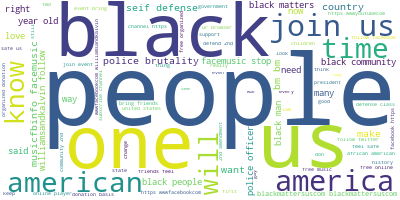

In [209]:
from wordcloud import WordCloud

# Join the different processed descriptions together
long_string = ','.join(list(documents['description_processed'].values))

# Create WordCloud object
wordcloud = WordCloud(background_color='white', max_words=5000,
                      contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloude
wordcloud.to_image()

# Plot ten most frequent words based on documents

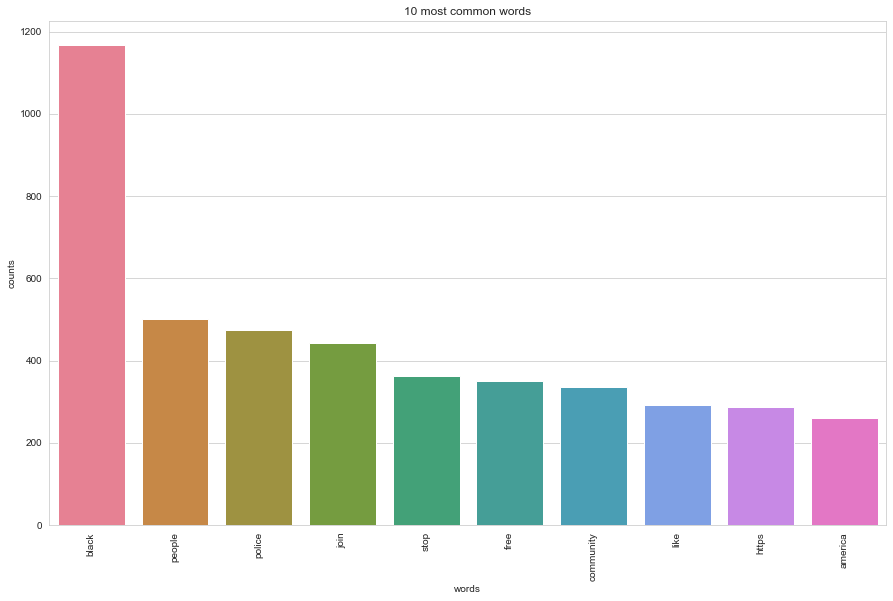

In [210]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts += t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x: x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))

    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(documents['description_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

# LDA model training and results visualization

In [211]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load LDA model from sk-learn

# Helper method
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx))
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))


# Tweak the two parameters below
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
black free stop join community 2nd defense music facemusic seif

Topic #1:
new like people police black man video country said government

Topic #2:
black police people blackmattersuscom america stop make join brutality war

Topic #3:
black https follow people police white williamsandkalvin don day like

Topic #4:
black people join stand trump american america like year old


# Let's analyze the LDA model results through visualization, we will use pyLDAvis to interact with the results in order to:
1. Understand the individual results better -- Manually select each topic to view it's top most frequent and/or "relevant terms using different values of λ. This can be of aid when assigning human interpretable name or "meaning" to each topic.
2. Understand the relationships between the topics -- Explore Intertopic Distance Plot that can assist in learning how topics relate to each other to reveal potential higher-level structure between groups of topics.

### * The alpha parameter represents document-topic density -- a higher alpha means that documents are made up of more topics and result in more specific topic distributions per document.

In [212]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))

LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

CPU times: user 7.07 s, sys: 196 ms, total: 7.27 s
Wall time: 3min 9s


/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


# -----------------------------------------------------

# Attempt another method

In [213]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tobbylie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Import the packages required

In [214]:
import warnings
import logging
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Prepare the Stopwords

In [215]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Import dataset

In [216]:
import pandas as pd
import numpy as np

# read dataset into pandas dataframe
df_items = pd.read_csv('items-Copy1.csv')

# replace field that's entirely space (or empty) with NaN
df_items = df_items.replace(np.nan, '', regex=True)

data_text = df_items[['description']]
data_text['index'] = data_text.index

documents = data_text

/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [217]:
len(documents)

3012

In [218]:
documents[:5]

,description,index
0,Black American racial experience is real. We s...,0
1,The best costume for Halloween worth posting. ...,1
2,"Keep on whining and crying for your president,...",2
3,"End the whining and crying, end the riots with...",3
4,Black girls are the definition of national gre...,4


# Function in order to lemmatize and stem  preprocess on the dataset

In [219]:
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [220]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [221]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

# Initialize stemmer

In [222]:
stemmer = SnowballStemmer('english')

# Display before and after of preprocessing on example document

In [223]:
doc_sample = documents[documents['index'] == 3].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)

print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['End', 'the', 'whining', 'and', 'crying,', 'end', 'the', 'riots', 'with', 'these', 'same', 'white\npeople(democrats),', 'who', 'will', 'not', 'march', 'with', 'you', 'when', 'your', 'son,', 'daughter', 'or\nloved', 'one', 'gets', 'shot', 'for', 'being', 'Black.\n\nI', 'opted', 'out', 'of', 'the', 'elections', 'and', 'i', 'had', 'many', 'Black', 'people', 'all', 'up', 'in', 'my', 'case,\ntelling', 'me', 'how', 'i', 'was', 'wrong', 'and', 'how', 'i', 'needed', 'to', 'make', 'my', 'vote', 'count', 'for', 'Mrs.\nClinton,', 'all', 'just', 'to', 'make', 'sure', 'Trump', "doesn't", 'become', 'president.\n\nWell', 'now', 'all', 'i', 'want', 'to', 'say', 'is', 'get', 'over', 'Trump', 'and', 'Clinton,', 'they', 'are', 'rich', 'white\npeople,', 'the', 'elite', 'who', 'were', 'born', 'into', 'and', 'are', 'a', 'part', 'of', 'the', 'system.\n\nI', 'dream', 'of', 'liberation,', 'not', 'staying', 'a', 'slave', 'under', 'Hillary', 'or', 'Trump,', 'so', 'forget\nyour', 'Childish', 

# Preprocess all description field text save result in 'processed_docs'

In [224]:
processed_docs = documents['description'].map(preprocess)
processed_docs[:10]

0    [black, american, racial, experi, real, suppor...
1    [best, costum, halloween, worth, post, power, ...
2    [whine, cri, presid, wasn, elect, imma, care, ...
3    [whine, cri, riot, white, peopl, democrat, mar...
4                [black, girl, definit, nation, great]
5    [imma, stay, comfi, untouch, work, hard, care,...
6    [disgust, video, circul, internet, show, unide...
7                           [imit, life, photo, great]
8    [america, racial, oppress, racism, ancient, hi...
9    [donald, john, trump, elect, presid, unit, sta...
Name: description, dtype: object

# Create Bigram and Trigram models utilizing Gensim's Phrases model

In [225]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(processed_docs, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[processed_docs], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[processed_docs[1000]]])


['monday', 'clinton', 'public', 'interview', 'event', 'ask', 'tell', 'iraq', 'intervent', 'libya', 'secretari', 'state', 'attack', 'benghazi', 'action', 'lie', 'caus', 'nation', 'scandal', 'offici', 'catch', 'lie', 'afford', 'statement', 'say', 'iraq', 'mistak', 'libya', 'differ', 'kind', 'calcul', 'lose', 'singl', 'person', 'year', 'pass', 'accid', 'clinton', 'contact', 'benghazi', 'victim', 'famili', 'excus', 'like', 'murder', 'american', 'exist', 'definit', 'need', 'presid', 'lie', 'twing', 'conscienc', 'luckili', 'american', 'trust', 'obvious', 'liar']


# Functions for stopwords, bigrams, trigrams 

In [226]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [227]:
data_words_bigrams = make_bigrams(processed_docs)

# Remove instances of https in data words as this is not significant
data_words_bigrams = [
    data_word_bigram for data_word_bigram in data_words_bigrams if 'https' not in data_word_bigram]
data_words_bigrams = [
    data_word_bigram for data_word_bigram in data_words_bigrams if 'httpszllwww' not in data_word_bigram]

data_words_bigrams

[['black',
  'american',
  'racial',
  'experi',
  'real',
  'support',
  'ammend',
  'safeti'],
 ['best', 'costum', 'halloween', 'worth', 'post', 'power', 'peopl'],
 ['whine',
  'cri',
  'presid',
  'wasn',
  'elect',
  'imma',
  'care',
  'kid',
  'grind',
  'sure',
  'best',
  'educ',
  'ensur',
  'dress',
  'healthi',
  'food',
  'tell',
  'thing',
  'wast',
  'time',
  'afterparti',
  'wouldn',
  'invit',
  'word',
  'wakeup',
  'organ',
  'joshuab_altonsterl',
  'terencecrutch_westandtogeth',
  'unit',
  'justic',
  'hovem',
  'electi',
  'black',
  'melanin_blackgirlmag',
  'blackahdproud_democrat',
  'republioan',
  'africanamerican',
  'unit',
  'justic',
  'vote_breakingnew'],
 ['whine',
  'cri',
  'riot',
  'white',
  'peopl',
  'democrat',
  'march',
  'daughter',
  'love',
  'get',
  'shoot',
  'black',
  'opt',
  'elect',
  'black',
  'peopl',
  'case',
  'tell',
  'wrong',
  'need',
  'vote',
  'count',
  'clinton',
  'sure',
  'trump',
  'presid',
  'want',
  'trump',
 

# Create the dictionary and Corpus for topic modeling
### Creates unique id for each word in the document. For example: (0, 1) implies word id 0 occurs once in the first document and word id 1 occurs once and so on. 

In [228]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Display
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]


# Can also see what word a given id corresponds to, pass the id as a key to the dictionary.

In [245]:
id2word[0]

'american'

In [246]:
# Human readable format of corpus for document 1
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('american', 1),
  ('ammend', 1),
  ('black', 1),
  ('experi', 1),
  ('racial', 1),
  ('real', 1),
  ('safeti', 1),
  ('support', 1)]]

# Build the topic model

In [230]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=26,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

# View the topics in the LDA model
### LDA model above is built with 26 topics. Each topic is a combination of keywords and each keyword contributes a certain weight to the topic. You can see the keywords for each topic and the importance (weight) of each keyword
### ex. Topic 0 represented as: 0.091*"protest" + 0.076*"hate" + 0.074*"organ" + 0.070*"ralli" + ''0.054*"futur" + 0.053*"charlott" + 0.051*"march" + 0.046*"violenc" + ''0.045*"celebr" + 0.035*"host"
### This means that the top 10 keywords that contribute to this topic are: 'protest', 'hate', 'organ' and so on so the weight of 'protest is 0.091. The weights reflect how important a keyword is to that topic. One can attempt to summarize the topics from these keywords

In [248]:
pprint(lda_model.print_topics(num_topics=26))
doc_lda = lda_model[corpus]

[(0,
  '0.091*"protest" + 0.076*"hate" + 0.074*"organ" + 0.070*"ralli" + '
  '0.054*"futur" + 0.053*"charlott" + 0.051*"march" + 0.046*"violenc" + '
  '0.045*"celebr" + 0.035*"host"'),
 (1,
  '0.220*"support" + 0.077*"protect" + 0.055*"histori" + 0.046*"educ" + '
  '0.046*"fact" + 0.042*"today" + 0.040*"rais" + 0.040*"children" + '
  '0.033*"sure" + 0.029*"young"'),
 (2,
  '0.293*"america" + 0.113*"go" + 0.095*"work" + 0.063*"problem" + '
  '0.045*"hard" + 0.041*"star" + 0.019*"male" + 0.019*"skin_color" + '
  '0.016*"sourc" + 0.015*"teacher"'),
 (3,
  '0.112*"free" + 0.093*"news" + 0.081*"busi" + 0.074*"video" + 0.062*"believ" '
  '+ 0.045*"break" + 0.037*"word" + 0.037*"kid" + 0.029*"liber" + '
  '0.029*"lose"'),
 (4,
  '0.189*"unit" + 0.110*"countri" + 0.101*"state" + 0.096*"time" + '
  '0.070*"come" + 0.059*"trump" + 0.058*"chang" + 0.035*"elect" + '
  '0.035*"music" + 0.022*"donald_trump"'),
 (5,
  '0.110*"follow" + 0.089*"video" + 0.057*"releas" + 0.056*"share" + '
  '0.052*"show

# Compute model Perplexity and Coherence score
## These metrics provide a convenient measure to judge how good a given topic model is.
1. Perplexity -- A measure of how well a probability distribution or probability model predicts a sample. Low perplexity indicates that a probability distribution is good at predicting a sample.
2. Coherence -- Measures a single topic by measuring the degree of semantic similiarity between high scoring words in the topic. This helps distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference. A set of statements or facts are said to be coherent if they support eachother. 

In [232]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -19.623874028422488

Coherence Score:  0.3636662676104618


# Let's analyze the LDA model results through visualization, we will use pyLDAvis to interact with the results in order to:
1. Understand the individual results better -- Manually select each topic to view it's top most frequent and/or "relevant terms using different values of λ. This can be of aid when assigning human interpretable name or "meaning" to each topic.
2. Understand the relationships between the topics -- Explore Intertopic Distance Plot that can assist in learning how topics relate to each other to reveal potential higher-level structure between groups of topics.

<ul>
<li>Each buble on the left-hand side represents a topic, the larger the topic, the more prevalent that topic is.</li>
    
<li>A good topic model should have fairly large, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.</li>
    
<li>A model with too many topics will typically have many overlaps and small sized bubbles clustered in one region.</li>
    
<li>If you hover over one of the bubbles, the words and bars on the right side will update, these words are the salient keywords that form the selected topic.</li>

<li>The alpha parameter represents document-topic density -- a higher alpha means that documents are made up of more topics and result in more specific topic distributions per document.</li>
</ul>

In [233]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18    -0.235716  0.336158       1        1  11.988910
24    -0.116869  0.020696       2        1   8.744078
7     -0.149982 -0.056640       3        1   8.456027
8     -0.268944 -0.259788       4        1   8.168566
6     -0.143397 -0.045067       5        1   7.325876
4     -0.089986 -0.032947       6        1   6.533164
1     -0.059184 -0.015030       7        1   5.975129
3     -0.052149  0.057659       8        1   4.998154
25    -0.019886 -0.018445       9        1   3.955160
16    -0.013743 -0.016794      10        1   3.865778
2      0.032913 -0.011934      11        1   3.180924
10     0.002180 -0.020111      12        1   3.144802
20     0.067430 -0.001217      13        1   3.102893
0      0.031197 -0.012518      14        1   2.688152
5     -0.004330  0.111962      15        1   2.334484
9      0.062420 -0.011217      16        1   2.238141
12     0.068147 -0.010437      17        1   2.131866
21     0.074094 -0.009974      18        1   2.037056
19     0.029038  0.009423      19        1   2.029403
22     0.066864 -0.004116      20        1   1.894336
13     0.110574 -0.003342      21        1   1.431413
17     0.115335 -0.002809      22        1   1.394387
11     0.118669 -0.002149      23        1   0.948912
23     0.118262 -0.002151      24        1   0.687984
14     0.120885 -0.001761      25        1   0.632617
15     0.136177  0.002550      26        1   0.111792, topic_info=     Category         Freq      Term        Total  loglift  logprob
2     Default  1943.000000     black  1943.000000  30.0000  30.0000
125   Default   654.000000      join   654.000000  29.0000  29.0000
11    Default   904.000000     peopl   904.000000  28.0000  28.0000
0     Default   774.000000  american   774.000000  27.0000  27.0000
165   Default   605.000000     polic   605.000000  26.0000  26.0000
...       ...          ...       ...          ...      ...      ...
1808  Topic26     0.008349      plan     1.478624   1.6196  -8.7031
1809  Topic26     0.008349     pledg     1.478623   1.6196  -8.7031
1810  Topic26     0.008349   ridicul     1.478623   1.6196  -8.7031
1811  Topic26     0.008349     throw     1.478623   1.6196  -8.7031
1812  Topic26     0.008349    access     1.478623   1.6196  -8.7031

[1888 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
704      13  0.965006   absolut
413       5  0.940836     accus
383       8  0.931403    achiev
332       4  0.940529  activist
112       7  0.940472    actual
...     ...       ...       ...
14       12  0.958428     worth
50       23  0.730443    wouldn
328       1  0.997795      year
494       7  0.976677     young
495       7  0.977244     youth

[470 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 25, 8, 9, 7, 5, 2, 4, 26, 17, 3, 11, 21, 1, 6, 10, 13, 22, 20, 23, 14, 18, 12, 24, 15, 16])

# Let's try the LDA Mallet Model. This may provide better quality of topics

In [234]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

import os
os.environ.update({'MALLET_HOME':r'/Users/tobbylie/Documents/my_projects/russian_disinformation/mallet-2.0.8'})

mallet_path = '/Users/tobbylie/Documents/my_projects/russian_disinformation/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=26, id2word=id2word)

In [235]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(1,
  [('black', 0.09926017262638717),
   ('great', 0.040073982737361284),
   ('kid', 0.032059186189889025),
   ('give', 0.02404438964241677),
   ('peopl', 0.01972872996300863),
   ('inspir', 0.017879161528976572),
   ('teach', 0.017879161528976572),
   ('divers', 0.01726263871763255),
   ('young', 0.01726263871763255),
   ('success', 0.01726263871763255)]),
 (9,
  [('stop', 0.18920765027322403),
   ('free', 0.1413934426229508),
   ('facemus', 0.08401639344262295),
   ('music', 0.08128415300546447),
   ('musicfb_info', 0.07308743169398907),
   ('onlin_player', 0.04644808743169399),
   ('listen', 0.03415300546448088),
   ('browser', 0.030737704918032786),
   ('onlin', 0.02663934426229508),
   ('world', 0.023224043715846996)]),
 (13,
  [('polic', 0.1615798922800718),
   ('brutal', 0.08856971873129862),
   ('protest', 0.03949730700179533),
   ('stop', 0.03590664272890485),
   ('forget', 0.031119090365050867),
   ('nation', 0.026331538001196888),
   ('kill', 0.026331538001196888),
   ('st

# How can we find the optimal number of topics?
### Build many LDA topics with different values of number of topics (k) and pick the one that gives the highest coherence value.

In [236]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [237]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_bigrams, start=2, limit=40, step=6)

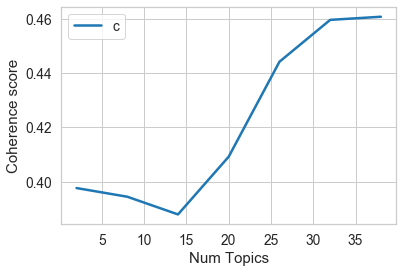

In [238]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [239]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3977
Num Topics = 8  has Coherence Value of 0.3945
Num Topics = 14  has Coherence Value of 0.388
Num Topics = 20  has Coherence Value of 0.4093
Num Topics = 26  has Coherence Value of 0.4442
Num Topics = 32  has Coherence Value of 0.4596
Num Topics = 38  has Coherence Value of 0.4608


In [240]:
# Select the model and print the topics
optimal_model = model_list[4]
print(coherence_values[4])
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

0.4442008988342631
[(24,
  '0.030*"immigr" + 0.028*"govern" + 0.026*"countri" + 0.025*"problem" + '
  '0.024*"state" + 0.024*"legal" + 0.023*"equal" + 0.021*"money" + '
  '0.019*"marriag" + 0.018*"illeg"'),
 (17,
  '0.033*"attack" + 0.029*"militari" + 0.028*"obama" + 0.026*"refuge" + '
  '0.025*"terrorist" + 0.024*"soldier" + 0.021*"forc" + 0.019*"syria" + '
  '0.017*"serv" + 0.016*"leader"'),
 (3,
  '0.360*"black" + 0.114*"matter" + 0.064*"life" + 0.030*"social" + '
  '0.024*"communiti" + 0.024*"issu" + 0.024*"racial" + 0.023*"african" + '
  '0.014*"beat" + 0.012*"plan"'),
 (18,
  '0.099*"unit" + 0.084*"justic" + 0.040*"stay" + 0.039*"wake" + 0.035*"make" '
  '+ 0.025*"elect" + 0.024*"care" + 0.022*"watch" + '
  '0.020*"melanin_blackgirlmag" + 0.018*"build"'),
 (0,
  '0.058*"good" + 0.057*"news" + 0.055*"fight" + 0.045*"patriot" + '
  '0.039*"follow" + 0.026*"flag" + 0.024*"welcom" + 0.024*"click_learn" + '
  '0.020*"heart" + 0.019*"team"'),
 (12,
  '0.037*"year" + 0.037*"love" + 0.02

# Find the dominant topic in each sentence
### In order to find out what topic a document is about we can find the topic number that has the highest percentage contribution in that document

In [241]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=documents['description'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.0734,"communiti, support, join, amend, gun_lover, pa...",Black American racial experience is real. We s...
1,1,5.0,0.0482,"veteran, care, histori, famili, vote, receiv, ...",The best costume for Halloween worth posting. ...
2,2,18.0,0.2711,"unit, justic, stay, wake, make, elect, care, w...","Keep on whining and crying for your president,..."
3,3,18.0,0.2067,"unit, justic, stay, wake, make, elect, care, w...","End the whining and crying, end the riots with..."
4,4,19.0,0.0531,"transgend, share, stori, turn, woman, land, ch...",Black girls are the definition of national gre...
5,5,18.0,0.2868,"unit, justic, stay, wake, make, elect, care, w...","Imma stay here comfy and untouched, yet workin..."
6,6,22.0,0.1762,"white, clinton, black, teen, hold, girl, ameri...",There is a disgusting video Circulating on the...
7,7,12.0,0.0521,"year, love, photo, month, week, event, feel, m...",Art imitates life art. This photo is great.
8,8,10.0,0.0839,"america, protect, stand, racism, illeg_immigr,...","In America, racial oppression and racism were ..."
9,9,9.0,0.2978,"trump, presid, america, work, peopl, state, ci...",Donald John Trump was elected the 45th preside...


# Find the most representative document for each topic
### To help understand the topic, we can find documents a given topic has contributed to the most and infer the topic by reading the document.

In [244]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.3012,"good, news, fight, patriot, follow, flag, welc...",Patrick got some weird ass fingers
1,1.0,0.4117,"polic, shoot, offic, year, kill, video, cop, f...","Houstonians, come out to honor the memory of H..."
2,2.0,0.5150,"chang, live, mother, child, action, countri, t...",We can be heard only when we stand together. B...
3,3.0,0.3663,"black, matter, life, social, communiti, issu, ...",Racism is not “Heritage and Honor”.lt’s time t...
4,4.0,0.1649,"communiti, support, join, amend, gun_lover, pa...",We do not want war or violence. We want eqauli...
5,5.0,0.4130,"veteran, care, histori, famili, vote, receiv, ...",The media did not report this story. But we wi...
6,6.0,0.3700,"black, beauti, women, girl, woman, histori, fe...",Free online player! Just add in ur browser and...
7,7.0,0.4084,"year, home, bring, life, children, prison, arr...",Native American history must be taught properl...
8,8.0,0.2720,"peopl, thing, love, cultur, freedom, start, op...",Thousands of Americans have already signed a p...
9,9.0,0.6436,"trump, presid, america, work, peopl, state, ci...",Crye Precision Six-12 12 ga shotgun with Silen...


# Topic distribution across documents
### We want to understand the volume and distributuion of topics in order to judge how widely it was discussed.

In [249]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(26)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,4.0,"communiti, support, join, amend, gun_lover, pa...",216.0,0.0747
1.0,5.0,"veteran, care, histori, famili, vote, receiv, ...",88.0,0.0304
2.0,18.0,"unit, justic, stay, wake, make, elect, care, w...",82.0,0.0284
3.0,18.0,"unit, justic, stay, wake, make, elect, care, w...",131.0,0.0453
4.0,19.0,"transgend, share, stori, turn, woman, land, ch...",237.0,0.0820
5.0,18.0,"unit, justic, stay, wake, make, elect, care, w...",86.0,0.0297
6.0,22.0,"white, clinton, black, teen, hold, girl, ameri...",159.0,0.0550
7.0,12.0,"year, love, photo, month, week, event, feel, m...",105.0,0.0363
8.0,10.0,"america, protect, stand, racism, illeg_immigr,...",108.0,0.0373
9.0,9.0,"trump, presid, america, work, peopl, state, ci...",58.0,0.0201
